In [1]:
# import cairocffi

In [2]:
from igraph import Graph

In [4]:
# from pylab import *
# %matplotlib inline

In [4]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jeffrey_alstott/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
from igraph import Graph
def d_min(g, n):
    if not g.predecessors(n):
        return nan
    return min(map(lambda x: g.outdegree(x), g.predecessors(n)))

def sample_bottlenecks_and_variance(n_nodes=100,
                                    p=.1,
                                    n_iterations=100):
    max_d_mins = empty(n_iterations)
    var_d_mins = empty(n_iterations)

    for i in range(n_iterations):
        g = Graph.Erdos_Renyi(n_nodes, p, directed=True)
        d_mins = list(map(lambda n: d_min(g,n), range(len(g.vs))))
        max_d_mins[i] = nanmax(d_mins)
        var_d_mins[i] = nanvar(d_mins)
    return max_d_mins, var_d_mins

100 0.046
100 0.092
1000 0.007
1000 0.014


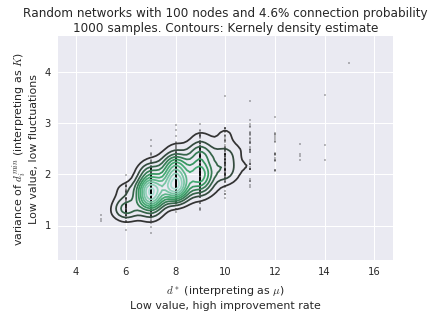

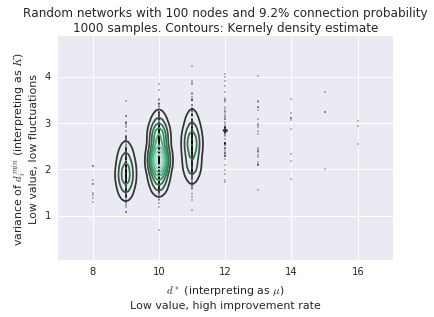

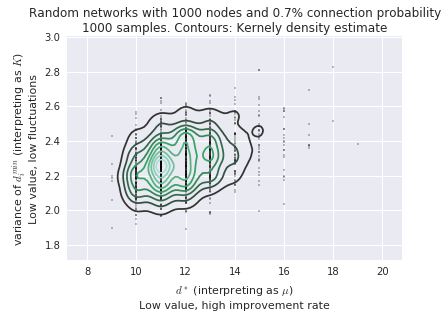

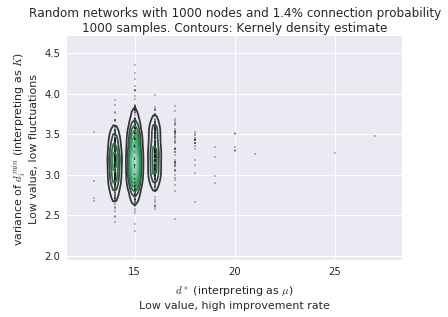

In [6]:
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plots = PdfPages('Random_Network_Bottlenecking_Figures.pdf')

n_iterations = 1000

for n_nodes in [100,1000]:
    for p in [round(log(n_nodes)/n_nodes, 3),
              round(2*(log(n_nodes)/n_nodes), 3)]:
        print(n_nodes, p)
        max_d_mins, var_d_mins = sample_bottlenecks_and_variance(n_nodes=n_nodes, p=p, n_iterations=n_iterations)
        figure()
        sns.kdeplot(max_d_mins, var_d_mins)
        xlabel(r'$d^*$ (interpreting as $\mu$)'+'\nLow value, high improvement rate')
        ylabel(r'variance of $d_{i}^{min}$ (interpreting as $K$)'+'\nLow value, low fluctuations')
        scatter(max_d_mins, var_d_mins, color='k', s=.5, label='Samples')
        title('Random networks with %i nodes and %.1f%% connection probability'
              '\n%i samples. Contours: Kernely density estimate'%(n_nodes, p*100, n_iterations))
        plots.savefig(gcf())

plots.close()

In [11]:
g = Graph.Lattice([1,1000],4,directed=True)

1000 0.1


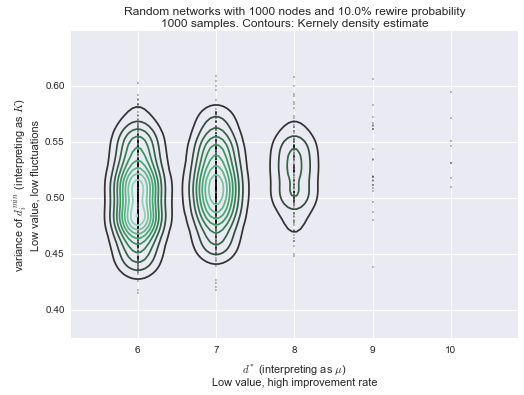

In [30]:
from igraph import Graph
def d_min(g, n):
    if not g.predecessors(n):
        return nan
    return min(map(lambda x: g.outdegree(x), g.predecessors(n)))

def sample_bottlenecks_and_variance(n_nodes=100,
                                    p=.1,
                                    n_iterations=100):
    max_d_mins = empty(n_iterations)
    var_d_mins = empty(n_iterations)

    for i in range(n_iterations):
        g = Graph.Lattice([1,n_nodes],4,directed=True)
        g.rewire_edges(p)
        d_mins = list(map(lambda n: d_min(g,n), range(len(g.vs))))
        max_d_mins[i] = nanmax(d_mins)
        var_d_mins[i] = nanvar(d_mins)
    return max_d_mins, var_d_mins

import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plots = PdfPages('Small_World_Network_Bottlenecking_Figures.pdf')

n_iterations = 1000

for n_nodes in [1000]:
    for p in [.1]:
        print(n_nodes, p)
        max_d_mins, var_d_mins = sample_bottlenecks_and_variance(n_nodes=n_nodes, p=p, n_iterations=n_iterations)
        figure()
        sns.kdeplot(max_d_mins, var_d_mins)
        xlabel(r'$d^*$ (interpreting as $\mu$)'+'\nLow value, high improvement rate')
        ylabel(r'variance of $d_{i}^{min}$ (interpreting as $K$)'+'\nLow value, low fluctuations')
        scatter(max_d_mins, var_d_mins, color='k', s=.5, label='Samples')
        title('Random networks with %i nodes and %.1f%% rewire probability'
              '\n%i samples. Contours: Kernely density estimate'%(n_nodes, p*100, n_iterations))
        plots.savefig(gcf())

plots.close()